In [144]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [145]:
df = pd.read_csv('../data/spotify.csv', encoding='latin-1')

In [146]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [147]:
df.columns = df.columns.str.lower().str.replace('_','').str.replace('%','')

In [148]:
df.head()

,trackname,artist(s)name,artistcount,releasedyear,releasedmonth,releasedday,inspotifyplaylists,inspotifycharts,streams,inappleplaylists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [149]:
df.dtypes

trackname             object
artist(s)name         object
artistcount            int64
releasedyear           int64
releasedmonth          int64
releasedday            int64
inspotifyplaylists     int64
inspotifycharts        int64
streams               object
inappleplaylists       int64
inapplecharts          int64
indeezerplaylists     object
indeezercharts         int64
inshazamcharts        object
bpm                    int64
key                   object
mode                  object
danceability           int64
valence                int64
energy                 int64
acousticness           int64
instrumentalness       int64
liveness               int64
speechiness            int64
dtype: object

In [150]:
df.isnull().sum()

trackname              0
artist(s)name          0
artistcount            0
releasedyear           0
releasedmonth          0
releasedday            0
inspotifyplaylists     0
inspotifycharts        0
streams                0
inappleplaylists       0
inapplecharts          0
indeezerplaylists      0
indeezercharts         0
inshazamcharts        50
bpm                    0
key                   95
mode                   0
danceability           0
valence                0
energy                 0
acousticness           0
instrumentalness       0
liveness               0
speechiness            0
dtype: int64

In [151]:
base = ['bpm','danceability','valence','energy',                
'acousticness',           
'instrumentalness',       
'liveness',               
'speechiness','streams','inspotifyplaylists','inspotifycharts','inappleplaylists','inapplecharts' ]

In [152]:
df = df[base]
df.head()

,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,streams,inspotifyplaylists,inspotifycharts,inappleplaylists,inapplecharts
0,125,80,89,83,31,0,8,4,141381703,553,147,43,263
1,92,71,61,74,7,0,10,4,133716286,1474,48,48,126
2,138,51,32,53,17,0,31,6,140003974,1397,113,94,207
3,170,55,58,72,11,0,11,15,800840817,7858,100,116,207
4,144,65,23,80,14,63,11,6,303236322,3133,50,84,133


In [153]:
df.dtypes

bpm                    int64
danceability           int64
valence                int64
energy                 int64
acousticness           int64
instrumentalness       int64
liveness               int64
speechiness            int64
streams               object
inspotifyplaylists     int64
inspotifycharts        int64
inappleplaylists       int64
inapplecharts          int64
dtype: object

In [154]:
print(df['streams'].isin([np.inf, -np.inf]).sum())

0


In [155]:
# See what non-numeric values are hiding
print(df[pd.to_numeric(df['streams'], errors='coerce').isnull()])

     bpm  danceability  valence  energy  acousticness  instrumentalness  \
574  110            53       75      69             7                 0   

     liveness  speechiness                                            streams  \
574        17            3  BPM110KeyAModeMajorDanceability53Valence75Ener...   

     inspotifyplaylists  inspotifycharts  inappleplaylists  inapplecharts  
574                2877                0                16              0  


In [156]:
# Convert to string first, remove any non-digit characters
df['streams'] = df['streams'].astype(str).str.replace(r'[^0-9]', '', regex=True)
# Then convert to int64
df['streams'] = pd.to_numeric(df['streams'], errors='coerce').fillna(0).astype('int64')

In [157]:
df.streams.isnull().sum()

0

In [158]:
streams_logs = np.log1p(df.streams)
streams_logs


0      18.766974
1      18.711231
2      18.757181
3      20.501173
4      19.530023
         ...    
948    18.331558
949    18.618481
950    18.112982
951    18.712571
952    18.379936
Name: streams, Length: 953, dtype: float64

<Axes: xlabel='streams', ylabel='Count'>

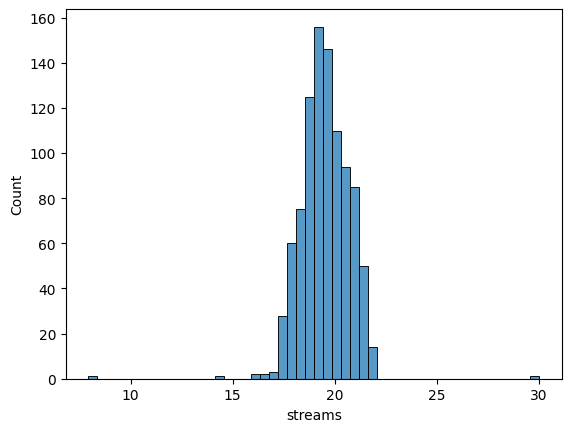

In [159]:

sns.histplot(streams_logs,bins=50)

In [160]:
df.head

<bound method NDFrame.head of      bpm  danceability  valence  energy  acousticness  instrumentalness  \
0    125            80       89      83            31                 0   
1     92            71       61      74             7                 0   
2    138            51       32      53            17                 0   
3    170            55       58      72            11                 0   
4    144            65       23      80            14                63   
..   ...           ...      ...     ...           ...               ...   
948  144            60       24      39            57                 0   
949  166            42        7      24            83                 1   
950   92            80       81      67             4                 0   
951   97            82       67      77             8                 0   
952   90            61       32      67            15                 0   

     liveness  speechiness    streams  inspotifyplaylists  inspotifyc

In [161]:
del df['streams']

In [162]:
df['streams'] = streams_logs

In [163]:
df.head()

,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,inspotifyplaylists,inspotifycharts,inappleplaylists,inapplecharts,streams
0,125,80,89,83,31,0,8,4,553,147,43,263,18.766974
1,92,71,61,74,7,0,10,4,1474,48,48,126,18.711231
2,138,51,32,53,17,0,31,6,1397,113,94,207,18.757181
3,170,55,58,72,11,0,11,15,7858,100,116,207,20.501173
4,144,65,23,80,14,63,11,6,3133,50,84,133,19.530023


In [170]:
def synthetic_data(df, multiplier_min=0.6, multiplier_max=0.9):
    df_new = df.copy()
    
    # Define audio features
    audio_features = ['bpm','danceability','valence','energy',                 
    'acousticness',           
    'instrumentalness',       
    'liveness',               
    'speechiness','streams','inappleplaylists','inspotifycharts','inspotifyplaylists','inapplecharts']
    
    multiplier = np.random.uniform(multiplier_min, multiplier_max)
    df_new[audio_features] *= multiplier
    
    
    
    return df_new

In [171]:
medium_songs = synthetic_data(df, 0.7, 0.9)

In [172]:
columns_to_round = medium_songs.columns.drop('streams')
medium_songs[columns_to_round] = medium_songs[columns_to_round].round(0).astype(int)
medium_songs

,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,inspotifyplaylists,inspotifycharts,inappleplaylists,inapplecharts,streams
0,92,59,66,61,23,0,6,3,408,108,32,194,13.830413
1,68,52,45,55,5,0,7,3,1086,35,35,93,13.789333
2,102,38,24,39,13,0,23,4,1030,83,69,153,13.823196
3,125,41,43,53,8,0,8,11,5791,74,85,153,15.108439
4,106,48,17,59,10,46,8,4,2309,37,62,98,14.392746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,106,44,18,29,42,0,6,2,702,0,45,10,13.509531
949,122,31,5,18,61,1,9,4,870,0,3,0,13.720980
950,68,59,60,49,3,0,6,4,422,0,1,0,13.348451
951,71,60,49,57,6,0,9,4,973,0,21,19,13.790321


In [173]:
low_songs = synthetic_data(df, 0.4, 0.7)
columns_to_round = low_songs.columns.drop('streams')
low_songs[columns_to_round] = low_songs[columns_to_round].round(0).astype(int)
low_songs
low_songs1 = synthetic_data(df, 0.7, 0.9)
columns_to_round = low_songs.columns.drop('streams')
low_songs1[columns_to_round] = low_songs1[columns_to_round].round(0).astype(int)
low_songs1
low_songs2 = synthetic_data(df, 0.7, 0.9)
columns_to_round = low_songs2.columns.drop('streams')
low_songs2[columns_to_round] = low_songs2[columns_to_round].round(0).astype(int)
low_songs2


,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,inspotifyplaylists,inspotifycharts,inappleplaylists,inapplecharts,streams
0,105,67,74,69,26,0,7,3,463,123,36,220,15.704953
1,77,59,51,62,6,0,8,3,1234,40,40,105,15.658305
2,115,43,27,44,14,0,26,5,1169,95,79,173,15.696758
3,142,46,49,60,9,0,9,13,6576,84,97,173,17.156199
4,121,54,19,67,12,53,9,5,2622,42,70,111,16.343503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,121,50,20,33,48,0,7,3,798,0,51,11,15.340580
949,139,35,6,20,69,1,10,5,987,0,3,0,15.580688
950,77,67,68,56,3,0,7,5,480,0,2,0,15.157666
951,81,69,56,64,7,0,10,4,1105,0,24,22,15.659426


In [215]:
final_df = pd.concat([df, medium_songs,low_songs], ignore_index=True)
#final_df = df
print(f"Total songs: {len(final_df)}")

Total songs: 2859


<Axes: xlabel='streams', ylabel='Count'>

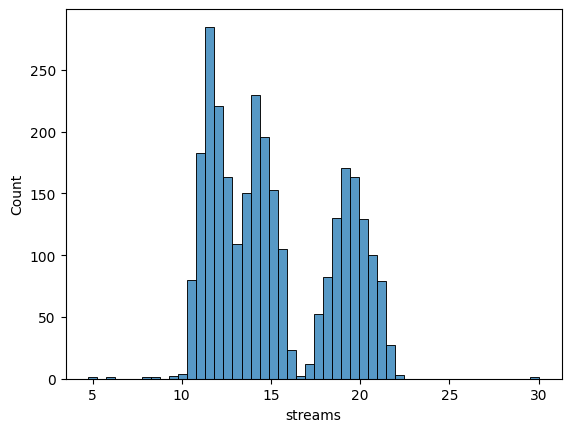

In [216]:
sns.histplot(final_df['streams'],bins=50)

In [217]:
n = len(final_df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [218]:
n, n_val, n_train, n_test

(2859, 571, 1717, 571)

In [219]:
idx = np.arange(n)
np.random.seed(69)
np.random.shuffle(idx)

In [220]:
df_train = final_df.iloc[idx[:n_train]]
df_val = final_df.iloc[idx[n_train:n_train+n_val]]
df_test= final_df.iloc[idx[n_train+n_val:]]

In [221]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [222]:
df_train

,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,inspotifyplaylists,inspotifycharts,inappleplaylists,inapplecharts,streams
0,160,51,69,81,0,0,21,5,6596,0,144,99,20.000248
1,130,54,58,63,31,0,5,13,3961,7,102,18,14.981147
2,103,67,71,42,28,0,29,21,3072,32,42,32,14.734668
3,206,43,50,55,50,0,15,10,8448,23,160,110,20.598645
4,55,49,23,36,19,0,4,2,274,14,5,70,11.776724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,53,41,10,43,9,0,7,3,1267,35,10,71,11.691020
1713,107,40,14,35,27,0,27,4,77,0,4,7,12.790983
1714,68,67,32,52,7,0,7,6,6537,32,77,88,15.541225
1715,85,52,66,54,22,0,8,4,5498,6,122,31,15.053880


In [223]:
y_train = df_train.streams.values
y_val = df_val.streams.values
y_test = df_test.streams.values

In [224]:
def train_linear_reg(X,y):
    ones = np.ones(X.shape[0])
    X = (np.column_stack([ones,X]))
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [225]:
base = ['bpm','danceability','valence','energy',                 
    'acousticness',           
    'instrumentalness',       
    'liveness',               
    'speechiness',]

In [226]:
X_train = df_train[base].values

In [227]:
w0,w = train_linear_reg(X_train,y_train)
w

array([ 0.03826298,  0.08066101, -0.01855624,  0.07311084,  0.03926878,
        0.00883926,  0.02057952, -0.01806909])

In [228]:
y_pred = w0 + X_train.dot(w)



<Axes: ylabel='Count'>

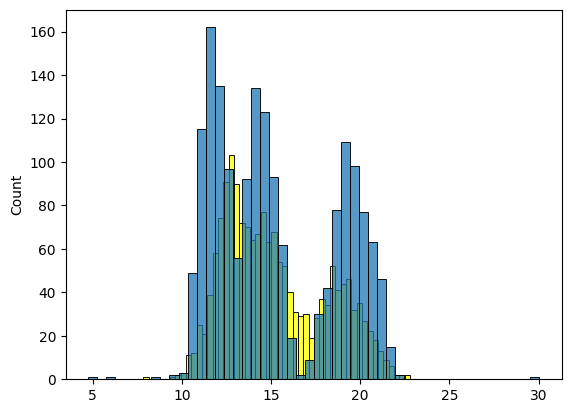

In [229]:
sns.histplot(y_pred, color = "yellow",bins = 50)
sns.histplot(y_train, bins=50)

In [230]:
def rmse(y,y_pred):
    error = y-y_pred
    se = error **2 
    mse = se.mean()
    return np.sqrt(mse)

In [231]:
rmse(y_train,y_pred)

1.8531195689158313

In [232]:
def features_X(df):
    df = df.copy()
    df ['energy_x_danceability'] = df['energy'] * df['danceability']
    df['valence_x_energy'] = df['valence'] * df['energy']
    df['mood_score'] = df['valence'] - df['acousticness']
    features = base + ['energy_x_danceability'] + ['valence_x_energy']+['mood_score']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [233]:
X_train = features_X(df_train)

In [234]:
def train_linear_reg(X,y,r = 0.00001):
    ones = np.ones(X.shape[0])
    X = (np.column_stack([ones,X]))
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [235]:
w0,w = train_linear_reg(X_train,y_train)

In [236]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

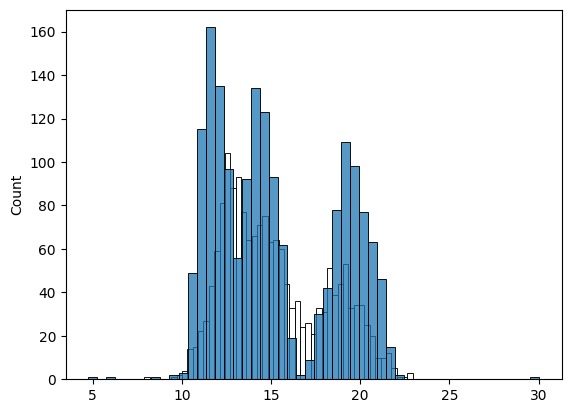

In [237]:
sns.histplot(y_pred, color = "white",bins = 50)
sns.histplot(y_train, bins=50)

In [238]:
rmse(y_train,y_pred)

1.8478078850332635

In [239]:
X_val = features_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse (y_val,y_pred)

1.832995918596944

In [240]:
# Calculate correlations
correlation_matrix = df.corr()

# Look at correlations with streams specifically
streams_corr = correlation_matrix['streams'].sort_values(ascending=False)
print(streams_corr)

streams               1.000000
inspotifyplaylists    0.603143
inappleplaylists      0.582713
inapplecharts         0.249517
inspotifycharts       0.153323
bpm                   0.005696
instrumentalness     -0.021303
energy               -0.023146
valence              -0.031435
acousticness         -0.034049
liveness             -0.045406
danceability         -0.074834
speechiness          -0.103992
Name: streams, dtype: float64
